In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [86]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


In [87]:
print("Dataset features:", california.feature_names)
print("Target variable: MedHouseVal")
print("\nFirst 5 rows:")
print(df.head())


Dataset features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal

First 5 rows:
   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]


In [88]:
X = df.drop('MedHouseVal', axis=1).values
y = df['MedHouseVal'].values.reshape(-1, 1)


In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")



Training set shape: (16512, 8), Test set shape: (4128, 8)


In [90]:

class LinearRegression:
    def __init__(self, n_features):
        self.weights = np.random.randn(n_features, 1) * np.sqrt(1/n_features)
        self.bias = np.zeros(1)
        
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def compute_loss(self, y_true, y_pred):
        lambda_reg = 0.01
        mse = np.mean((y_true - y_pred)**2)
        reg_term = (lambda_reg/2) * np.sum(self.weights**2)
        return mse + reg_term
    
    def compute_gradients(self, X, y_true, y_pred):
        m = X.shape[0]
        error = y_pred - y_true
        lambda_reg = 0.01
        
        dL_dw = (2/m) * np.dot(X.T, error) + lambda_reg * self.weights
        dL_db = (2/m) * np.sum(error)
        
        max_grad = 100
        dL_dw = np.clip(dL_dw, -max_grad, max_grad)
        dL_db = np.clip(dL_db, -max_grad, max_grad)
        
        return dL_dw, dL_db
    
    def update_parameters(self, dL_dw, dL_db, learning_rate):
        self.weights -= learning_rate * dL_dw
        self.bias -= learning_rate * dL_db


In [91]:
n_features = X_train.shape[1]
model = LinearRegression(n_features)

initial_learning_rate = 0.01
epochs = 500
train_losses = []
test_losses = []


In [92]:

for epoch in range(epochs):
    learning_rate = initial_learning_rate * (0.1 ** (epoch // (epochs / 10)))
    
    y_pred = model.forward(X_train)
    
    train_loss = model.compute_loss(y_train, y_pred)
    train_losses.append(train_loss)
    
    test_pred = model.forward(X_test)
    test_loss = model.compute_loss(y_test, test_pred)
    test_losses.append(test_loss)
    
    dL_dw, dL_db = model.compute_gradients(X_train, y_train, y_pred)
    
    model.update_parameters(dL_dw, dL_db, learning_rate)
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch:3d}, LR: {learning_rate:.5f}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


Epoch   0, LR: 0.01000, Train Loss: 8.1700, Test Loss: 8.0264
Epoch  50, LR: 0.00100, Train Loss: 1.7236, Test Loss: 1.6945
Epoch 100, LR: 0.00010, Train Loss: 1.5375, Test Loss: 1.5138
Epoch 150, LR: 0.00001, Train Loss: 1.5208, Test Loss: 1.4976
Epoch 200, LR: 0.00000, Train Loss: 1.5192, Test Loss: 1.4960
Epoch 250, LR: 0.00000, Train Loss: 1.5190, Test Loss: 1.4958
Epoch 300, LR: 0.00000, Train Loss: 1.5190, Test Loss: 1.4958
Epoch 350, LR: 0.00000, Train Loss: 1.5190, Test Loss: 1.4958
Epoch 400, LR: 0.00000, Train Loss: 1.5190, Test Loss: 1.4958
Epoch 450, LR: 0.00000, Train Loss: 1.5190, Test Loss: 1.4958


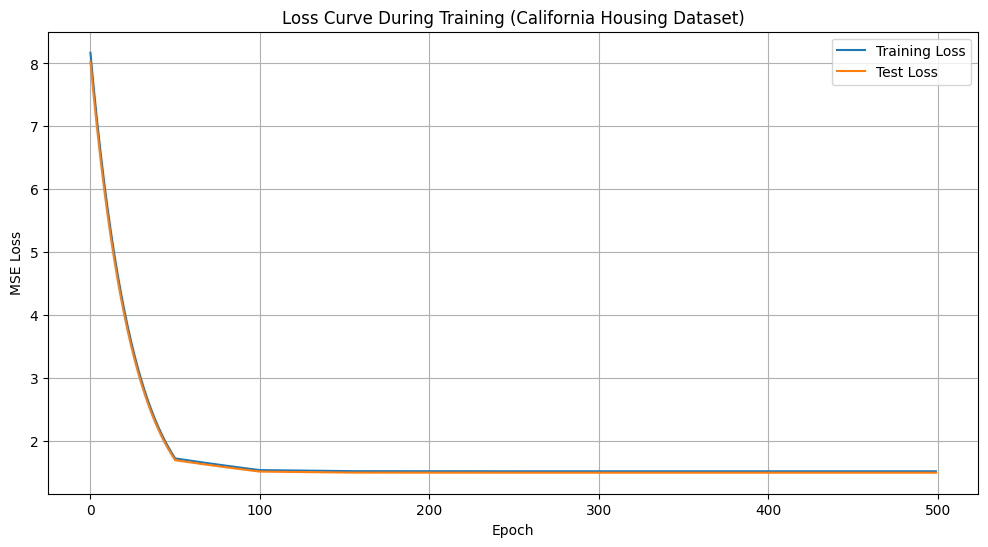

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve During Training (California Housing Dataset)')
plt.legend()
plt.grid(True)
plt.show()


In [94]:

final_pred = model.forward(X_test)

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': final_pred.flatten(),
    'Difference': (y_test - final_pred).flatten()
})

print("\nPrediction Comparison Table (First 10 samples):")
print(results.head(10).to_string(index=False))



Prediction Comparison Table (First 10 samples):
 Actual  Predicted  Difference
0.47700   1.109381   -0.632381
0.45800   1.172528   -0.714528
5.00001   0.921808    4.078202
2.18600   1.814749    0.371251
2.78000   1.330729    1.449271
1.58700   1.601434   -0.014434
1.98200   1.681304    0.300696
1.57500   1.370336    0.204664
3.40000   1.734752    1.665248
4.46600   1.943856    2.522144


In [95]:
final_train_loss = model.compute_loss(y_train, model.forward(X_train))
final_test_loss = model.compute_loss(y_test, final_pred)
print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")
print(f"Average Prediction Error: ${np.mean(np.abs(results['Difference']))*100000:.2f}")



Final Training Loss: 1.5190
Final Test Loss: 1.4958
Average Prediction Error: $87898.22


In [96]:

feature_importance = pd.DataFrame({
    'Feature': california.feature_names,
    'Weight': model.weights.flatten()
}).sort_values('Weight', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance.to_string(index=False))


Feature Importance:
   Feature    Weight
    MedInc  0.245044
Population -0.183695
  HouseAge -0.151376
  AveRooms  0.113775
  AveOccup  0.064259
  Latitude -0.055488
 AveBedrms -0.027953
 Longitude  0.016258
